# Machine Learning Basics  

Machine learning is a discipline that deals with the study of methods for pattern recognition in datasets undergoing data analysis.
- learn from data
- build model
- make predictions  

### Supervised learning
The methods in which the training set contains additional attributes that you want to predict (*the target, or dependant variate*)  
- **Classification**: the target belongs to two or more classes or categories.
- **Regression**: the target to be predicted has continuous variate.

### Unsupervised learning
the methods in which the training set consists of a series of input values $x$ without any corresponding target value.
- **Clustering**: discover groups of similar examples in a dataset
- **Dimensionality reduction**: consider a dataset with $n$ columns (variates) data, it can be treated as a n-dimensional feature space. dimensionality reduction is to find new data from original and then makes the higher dimension turns into lower dimension which is easier for training the model.


# Linear regression, using WHO data

### Data preparation

Visit WHO data web service and find all data provided at their [web service site](https://apps.who.int/gho/athena/).  
Click the first item 'Access the Global Health Observatory user interface', you can browse their data by category or special item, and download the data you wanted.  
Click 'By Indicator' can find one specific indicator, view the definition and raw data, also can download the data.  
Download the data in .csv format and we later process it.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.rcParams.update({'figure.figsize': (12,6),\
                     'figure.titlesize':16,\
                     'axes.titlesize':16,\
                     'axes.labelsize':14,\
                     'xtick.labelsize':14,\
                     'ytick.labelsize':14,
                    })

In [33]:
import pathlib
file_path = pathlib.Path('D:/Edu/data_resource/data-who/age standardized suicide rate.csv')

df = pd.read_csv(file_path, header=1)
df

,Country,Sex,2019,2018,2017,2016,2015,2014,2013,2012,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,Both sexes,6.0 [3.4-9.9],5.9 [3.4-9.8],6.0 [3.4-9.9],6.0 [3.5-9.9],6.0 [3.5-9.9],6.0 [3.5-9.9],6.2 [3.6-10.2],6.2 [3.6-10.2],...,6.8 [4.0-11.1],7.2 [4.2-11.7],7.4 [4.3-12.1],7.6 [4.4-12.3],7.6 [4.4-12.3],7.8 [4.5-12.6],7.7 [4.5-12.5],7.9 [4.5-12.8],7.9 [4.5-12.8],7.7 [4.4-12.5]
1,Afghanistan,Male,6.2 [3.5-10.5],6.2 [3.5-10.4],6.3 [3.7-10.7],6.2 [3.6-10.3],6.1 [3.6-10.2],6.1 [3.6-10.2],6.3 [3.7-10.5],6.4 [3.7-10.5],...,7.0 [4.1-11.6],7.4 [4.3-12.2],7.7 [4.5-12.6],7.8 [4.5-12.7],7.8 [4.5-12.7],7.9 [4.5-12.9],7.8 [4.5-12.8],8.0 [4.6-13.1],7.9 [4.5-12.9],7.6 [4.4-12.5]
2,Afghanistan,Female,5.7 [3.2-9.2],5.6 [3.2-9.1],5.5 [3.1-9.0],5.8 [3.3-9.5],5.8 [3.3-9.4],5.9 [3.4-9.5],6.0 [3.5-9.8],6.1 [3.6-9.8],...,6.6 [3.9-10.5],6.9 [4.0-11.0],7.1 [4.2-11.4],7.3 [4.3-11.7],7.4 [4.3-11.9],7.6 [4.4-12.2],7.6 [4.5-12.2],7.7 [4.5-12.4],7.9 [4.6-12.6],7.8 [4.5-12.4]
3,Albania,Both sexes,3.7 [2.1-5.7],3.9 [2.2-6.0],4.1 [2.3-6.3],4.2 [2.3-6.3],4.2 [2.3-6.4],4.5 [2.5-6.7],4.8 [2.7-7.1],4.8 [2.8-7.0],...,8.0 [4.8-10.8],8.1 [5.0-10.8],8.1 [5.0-10.6],7.8 [5.0-10.2],7.7 [4.9-10.0],4.9 [3.1-6.3],4.9 [3.3-6.4],4.8 [3.2-6.3],4.7 [3.2-6.2],5.2 [3.6-6.9]
4,Albania,Male,5.3 [2.7-8.3],5.6 [2.9-8.7],5.7 [2.9-9.0],5.7 [2.9-8.8],5.7 [2.9-8.7],6.2 [3.1-9.3],6.5 [3.4-9.7],6.6 [3.4-9.6],...,10.2 [5.4-14.0],10.5 [5.6-14.2],10.5 [5.8-14.1],10.1 [5.7-13.4],10.2 [5.9-13.4],6.7 [4.0-8.8],6.6 [4.1-8.7],6.6 [4.1-8.7],6.5 [4.2-8.5],7.6 [5.1-10.1]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Zambia,Male,25.7 [16.0-39.0],28.1 [17.7-42.4],29.1 [18.4-43.7],29.1 [18.5-43.5],30.0 [19.2-44.6],30.2 [19.5-44.5],30.0 [19.4-44.1],31.1 [20.3-45.5],...,32.6 [21.5-47.5],32.8 [21.6-47.9],33.4 [21.9-49.4],35.6 [23.3-52.9],35.8 [23.2-53.4],35.8 [23.2-53.4],34.2 [22.0-51.2],34.5 [22.1-51.9],34.3 [21.8-51.7],35.9 [22.8-54.0]
545,Zambia,Female,5.3 [3.1-8.4],6.0 [3.5-9.6],6.6 [3.9-10.6],6.7 [3.9-10.7],7.1 [4.2-11.2],7.9 [4.7-12.4],8.5 [5.1-13.3],8.7 [5.2-13.5],...,8.4 [5.1-12.9],8.2 [5.0-12.7],9.2 [5.6-14.3],11.0 [6.6-17.2],11.4 [6.8-18.1],11.9 [7.0-18.8],11.4 [6.7-18.1],12.6 [7.3-20.0],13.4 [7.8-21.3],14.5 [8.5-23.1]
546,Zimbabwe,Both sexes,23.6 [12.6-37.5],23.9 [12.7-37.8],25.9 [13.8-40.9],28.7 [15.4-45.3],30.7 [16.6-48.3],30.8 [16.7-48.4],31.4 [17.2-48.9],33.1 [18.1-51.3],...,35.2 [19.3-55.1],31.7 [17.3-49.5],27.2 [14.7-42.5],22.0 [11.7-34.5],22.0 [11.7-34.4],21.5 [11.4-33.7],20.2 [10.7-31.7],20.3 [10.7-32.0],19.5 [10.2-30.7],20.0 [10.3-31.5]
547,Zimbabwe,Male,37.8 [19.6-59.0],38.6 [19.8-60.3],41.3 [21.2-64.6],44.5 [22.8-69.2],47.4 [24.5-73.4],45.3 [23.5-70.1],46.4 [24.2-71.2],50.7 [26.6-77.7],...,48.3 [25.3-73.9],42.0 [21.9-64.0],36.3 [18.8-55.2],28.5 [14.5-43.3],32.1 [16.7-48.9],30.1 [15.6-45.7],29.4 [15.5-44.3],29.8 [15.7-44.8],28.6 [15.1-42.8],28.2 [14.8-42.1]


In [34]:
df.dtypes

Country    object
Sex        object
 2019      object
 2018      object
 2017      object
 2016      object
 2015      object
 2014      object
 2013      object
 2012      object
 2011      object
 2010      object
 2009      object
 2008      object
 2007      object
 2006      object
 2005      object
 2004      object
 2003      object
 2002      object
 2001      object
 2000      object
dtype: object

In [35]:
df.columns

Index(['Country', 'Sex', ' 2019', ' 2018', ' 2017', ' 2016', ' 2015', ' 2014',
       ' 2013', ' 2012', ' 2011', ' 2010', ' 2009', ' 2008', ' 2007', ' 2006',
       ' 2005', ' 2004', ' 2003', ' 2002', ' 2001', ' 2000'],
      dtype='object')

In [36]:
df.columns = df.columns.map(lambda x: x.strip())
df

,Country,Sex,2019,2018,2017,2016,2015,2014,2013,2012,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,Both sexes,6.0 [3.4-9.9],5.9 [3.4-9.8],6.0 [3.4-9.9],6.0 [3.5-9.9],6.0 [3.5-9.9],6.0 [3.5-9.9],6.2 [3.6-10.2],6.2 [3.6-10.2],...,6.8 [4.0-11.1],7.2 [4.2-11.7],7.4 [4.3-12.1],7.6 [4.4-12.3],7.6 [4.4-12.3],7.8 [4.5-12.6],7.7 [4.5-12.5],7.9 [4.5-12.8],7.9 [4.5-12.8],7.7 [4.4-12.5]
1,Afghanistan,Male,6.2 [3.5-10.5],6.2 [3.5-10.4],6.3 [3.7-10.7],6.2 [3.6-10.3],6.1 [3.6-10.2],6.1 [3.6-10.2],6.3 [3.7-10.5],6.4 [3.7-10.5],...,7.0 [4.1-11.6],7.4 [4.3-12.2],7.7 [4.5-12.6],7.8 [4.5-12.7],7.8 [4.5-12.7],7.9 [4.5-12.9],7.8 [4.5-12.8],8.0 [4.6-13.1],7.9 [4.5-12.9],7.6 [4.4-12.5]
2,Afghanistan,Female,5.7 [3.2-9.2],5.6 [3.2-9.1],5.5 [3.1-9.0],5.8 [3.3-9.5],5.8 [3.3-9.4],5.9 [3.4-9.5],6.0 [3.5-9.8],6.1 [3.6-9.8],...,6.6 [3.9-10.5],6.9 [4.0-11.0],7.1 [4.2-11.4],7.3 [4.3-11.7],7.4 [4.3-11.9],7.6 [4.4-12.2],7.6 [4.5-12.2],7.7 [4.5-12.4],7.9 [4.6-12.6],7.8 [4.5-12.4]
3,Albania,Both sexes,3.7 [2.1-5.7],3.9 [2.2-6.0],4.1 [2.3-6.3],4.2 [2.3-6.3],4.2 [2.3-6.4],4.5 [2.5-6.7],4.8 [2.7-7.1],4.8 [2.8-7.0],...,8.0 [4.8-10.8],8.1 [5.0-10.8],8.1 [5.0-10.6],7.8 [5.0-10.2],7.7 [4.9-10.0],4.9 [3.1-6.3],4.9 [3.3-6.4],4.8 [3.2-6.3],4.7 [3.2-6.2],5.2 [3.6-6.9]
4,Albania,Male,5.3 [2.7-8.3],5.6 [2.9-8.7],5.7 [2.9-9.0],5.7 [2.9-8.8],5.7 [2.9-8.7],6.2 [3.1-9.3],6.5 [3.4-9.7],6.6 [3.4-9.6],...,10.2 [5.4-14.0],10.5 [5.6-14.2],10.5 [5.8-14.1],10.1 [5.7-13.4],10.2 [5.9-13.4],6.7 [4.0-8.8],6.6 [4.1-8.7],6.6 [4.1-8.7],6.5 [4.2-8.5],7.6 [5.1-10.1]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Zambia,Male,25.7 [16.0-39.0],28.1 [17.7-42.4],29.1 [18.4-43.7],29.1 [18.5-43.5],30.0 [19.2-44.6],30.2 [19.5-44.5],30.0 [19.4-44.1],31.1 [20.3-45.5],...,32.6 [21.5-47.5],32.8 [21.6-47.9],33.4 [21.9-49.4],35.6 [23.3-52.9],35.8 [23.2-53.4],35.8 [23.2-53.4],34.2 [22.0-51.2],34.5 [22.1-51.9],34.3 [21.8-51.7],35.9 [22.8-54.0]
545,Zambia,Female,5.3 [3.1-8.4],6.0 [3.5-9.6],6.6 [3.9-10.6],6.7 [3.9-10.7],7.1 [4.2-11.2],7.9 [4.7-12.4],8.5 [5.1-13.3],8.7 [5.2-13.5],...,8.4 [5.1-12.9],8.2 [5.0-12.7],9.2 [5.6-14.3],11.0 [6.6-17.2],11.4 [6.8-18.1],11.9 [7.0-18.8],11.4 [6.7-18.1],12.6 [7.3-20.0],13.4 [7.8-21.3],14.5 [8.5-23.1]
546,Zimbabwe,Both sexes,23.6 [12.6-37.5],23.9 [12.7-37.8],25.9 [13.8-40.9],28.7 [15.4-45.3],30.7 [16.6-48.3],30.8 [16.7-48.4],31.4 [17.2-48.9],33.1 [18.1-51.3],...,35.2 [19.3-55.1],31.7 [17.3-49.5],27.2 [14.7-42.5],22.0 [11.7-34.5],22.0 [11.7-34.4],21.5 [11.4-33.7],20.2 [10.7-31.7],20.3 [10.7-32.0],19.5 [10.2-30.7],20.0 [10.3-31.5]
547,Zimbabwe,Male,37.8 [19.6-59.0],38.6 [19.8-60.3],41.3 [21.2-64.6],44.5 [22.8-69.2],47.4 [24.5-73.4],45.3 [23.5-70.1],46.4 [24.2-71.2],50.7 [26.6-77.7],...,48.3 [25.3-73.9],42.0 [21.9-64.0],36.3 [18.8-55.2],28.5 [14.5-43.3],32.1 [16.7-48.9],30.1 [15.6-45.7],29.4 [15.5-44.3],29.8 [15.7-44.8],28.6 [15.1-42.8],28.2 [14.8-42.1]


In [37]:
df.columns

Index(['Country', 'Sex', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
       '2004', '2003', '2002', '2001', '2000'],
      dtype='object')

In [38]:
df.loc[:,'2019':'2000'] = (df.loc[:, '2019':'2000'].applymap(lambda x: x.split()[0])).to_numpy()
df

,Country,Sex,2019,2018,2017,2016,2015,2014,2013,2012,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,Both sexes,6.0,5.9,6.0,6.0,6.0,6.0,6.2,6.2,...,6.8,7.2,7.4,7.6,7.6,7.8,7.7,7.9,7.9,7.7
1,Afghanistan,Male,6.2,6.2,6.3,6.2,6.1,6.1,6.3,6.4,...,7.0,7.4,7.7,7.8,7.8,7.9,7.8,8.0,7.9,7.6
2,Afghanistan,Female,5.7,5.6,5.5,5.8,5.8,5.9,6.0,6.1,...,6.6,6.9,7.1,7.3,7.4,7.6,7.6,7.7,7.9,7.8
3,Albania,Both sexes,3.7,3.9,4.1,4.2,4.2,4.5,4.8,4.8,...,8.0,8.1,8.1,7.8,7.7,4.9,4.9,4.8,4.7,5.2
4,Albania,Male,5.3,5.6,5.7,5.7,5.7,6.2,6.5,6.6,...,10.2,10.5,10.5,10.1,10.2,6.7,6.6,6.6,6.5,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Zambia,Male,25.7,28.1,29.1,29.1,30.0,30.2,30.0,31.1,...,32.6,32.8,33.4,35.6,35.8,35.8,34.2,34.5,34.3,35.9
545,Zambia,Female,5.3,6.0,6.6,6.7,7.1,7.9,8.5,8.7,...,8.4,8.2,9.2,11.0,11.4,11.9,11.4,12.6,13.4,14.5
546,Zimbabwe,Both sexes,23.6,23.9,25.9,28.7,30.7,30.8,31.4,33.1,...,35.2,31.7,27.2,22.0,22.0,21.5,20.2,20.3,19.5,20.0
547,Zimbabwe,Male,37.8,38.6,41.3,44.5,47.4,45.3,46.4,50.7,...,48.3,42.0,36.3,28.5,32.1,30.1,29.4,29.8,28.6,28.2


In [39]:
print('-'+df['Sex'][0]+'-')

- Both sexes-


In [40]:
df['Sex'] = df['Sex'].map(lambda x: x.strip())
df

,Country,Sex,2019,2018,2017,2016,2015,2014,2013,2012,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,Both sexes,6.0,5.9,6.0,6.0,6.0,6.0,6.2,6.2,...,6.8,7.2,7.4,7.6,7.6,7.8,7.7,7.9,7.9,7.7
1,Afghanistan,Male,6.2,6.2,6.3,6.2,6.1,6.1,6.3,6.4,...,7.0,7.4,7.7,7.8,7.8,7.9,7.8,8.0,7.9,7.6
2,Afghanistan,Female,5.7,5.6,5.5,5.8,5.8,5.9,6.0,6.1,...,6.6,6.9,7.1,7.3,7.4,7.6,7.6,7.7,7.9,7.8
3,Albania,Both sexes,3.7,3.9,4.1,4.2,4.2,4.5,4.8,4.8,...,8.0,8.1,8.1,7.8,7.7,4.9,4.9,4.8,4.7,5.2
4,Albania,Male,5.3,5.6,5.7,5.7,5.7,6.2,6.5,6.6,...,10.2,10.5,10.5,10.1,10.2,6.7,6.6,6.6,6.5,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Zambia,Male,25.7,28.1,29.1,29.1,30.0,30.2,30.0,31.1,...,32.6,32.8,33.4,35.6,35.8,35.8,34.2,34.5,34.3,35.9
545,Zambia,Female,5.3,6.0,6.6,6.7,7.1,7.9,8.5,8.7,...,8.4,8.2,9.2,11.0,11.4,11.9,11.4,12.6,13.4,14.5
546,Zimbabwe,Both sexes,23.6,23.9,25.9,28.7,30.7,30.8,31.4,33.1,...,35.2,31.7,27.2,22.0,22.0,21.5,20.2,20.3,19.5,20.0
547,Zimbabwe,Male,37.8,38.6,41.3,44.5,47.4,45.3,46.4,50.7,...,48.3,42.0,36.3,28.5,32.1,30.1,29.4,29.8,28.6,28.2


In [41]:
type_convert = {'Country': 'string', 'Sex': 'category', '2019': float, '2018': float, '2017': float, '2016': float, '2015': float,
                '2014': float, '2013': float, '2012': float, '2011': float, '2010': float, '2009': float, '2008': float, '2007': float,
                '2006': float, '2005': float, '2004': float, '2003': float, '2002': float, '2001': float, '2000': float,}
df = df.astype(type_convert)
df

,Country,Sex,2019,2018,2017,2016,2015,2014,2013,2012,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,Both sexes,6.0,5.9,6.0,6.0,6.0,6.0,6.2,6.2,...,6.8,7.2,7.4,7.6,7.6,7.8,7.7,7.9,7.9,7.7
1,Afghanistan,Male,6.2,6.2,6.3,6.2,6.1,6.1,6.3,6.4,...,7.0,7.4,7.7,7.8,7.8,7.9,7.8,8.0,7.9,7.6
2,Afghanistan,Female,5.7,5.6,5.5,5.8,5.8,5.9,6.0,6.1,...,6.6,6.9,7.1,7.3,7.4,7.6,7.6,7.7,7.9,7.8
3,Albania,Both sexes,3.7,3.9,4.1,4.2,4.2,4.5,4.8,4.8,...,8.0,8.1,8.1,7.8,7.7,4.9,4.9,4.8,4.7,5.2
4,Albania,Male,5.3,5.6,5.7,5.7,5.7,6.2,6.5,6.6,...,10.2,10.5,10.5,10.1,10.2,6.7,6.6,6.6,6.5,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Zambia,Male,25.7,28.1,29.1,29.1,30.0,30.2,30.0,31.1,...,32.6,32.8,33.4,35.6,35.8,35.8,34.2,34.5,34.3,35.9
545,Zambia,Female,5.3,6.0,6.6,6.7,7.1,7.9,8.5,8.7,...,8.4,8.2,9.2,11.0,11.4,11.9,11.4,12.6,13.4,14.5
546,Zimbabwe,Both sexes,23.6,23.9,25.9,28.7,30.7,30.8,31.4,33.1,...,35.2,31.7,27.2,22.0,22.0,21.5,20.2,20.3,19.5,20.0
547,Zimbabwe,Male,37.8,38.6,41.3,44.5,47.4,45.3,46.4,50.7,...,48.3,42.0,36.3,28.5,32.1,30.1,29.4,29.8,28.6,28.2


In [42]:
df.dtypes

Country      string
Sex        category
2019        float64
2018        float64
2017        float64
2016        float64
2015        float64
2014        float64
2013        float64
2012        float64
2011        float64
2010        float64
2009        float64
2008        float64
2007        float64
2006        float64
2005        float64
2004        float64
2003        float64
2002        float64
2001        float64
2000        float64
dtype: object

In [43]:
country_2019 = pd.pivot_table(df, index=['Country'], columns=['Sex'], values=['2019'])
country_2019

2019             
Sex                                Both sexes Female  Male
Country                                                   
Afghanistan                               6.0    5.7   6.2
Albania                                   3.7    2.2   5.3
Algeria                                   2.6    1.9   3.3
Angola                                   12.6    4.7  21.7
Antigua and Barbuda                       0.3    0.6   0.0
...                                       ...    ...   ...
Venezuela (Bolivarian Republic of)        2.1    0.7   3.7
Viet Nam                                  7.2    4.2  10.6
Yemen                                     7.1    5.3   9.0
Zambia                                   14.4    5.3  25.7
Zimbabwe                                 23.6   13.5  37.8

[183 rows x 3 columns]

In [44]:
country_2019.shape

(183, 3)

In [45]:
country_2019.dtypes

      Sex       
2019  Both sexes    float64
      Female        float64
      Male          float64
dtype: object

In [46]:
country_2019.columns

MultiIndex([('2019', 'Both sexes'),
            ('2019',     'Female'),
            ('2019',       'Male')],
           names=[None, 'Sex'])

In [47]:
country_2019.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Republic of Tanzania', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)',
       'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=183)

In [48]:
country_2019[('2019', 'Male')]  # notice the columns using MultiIndex, need use tuple.

Country
Afghanistan                            6.2
Albania                                5.3
Algeria                                3.3
Angola                                21.7
Antigua and Barbuda                    0.0
                                      ... 
Venezuela (Bolivarian Republic of)     3.7
Viet Nam                              10.6
Yemen                                  9.0
Zambia                                25.7
Zimbabwe                              37.8
Name: (2019, Male), Length: 183, dtype: float64

In [49]:
country_2019 = country_2019.droplevel(level=0,axis=1)
#country_2019.set_axis(country_2019.columns.map(lambda x: x[1]), axis=1, inplace=True)  # remove MultiIndex and keep only one index for columns
country_2019

Sex,Both sexes,Female,Male
Country,,,
Afghanistan,6.0,5.7,6.2
Albania,3.7,2.2,5.3
Algeria,2.6,1.9,3.3
Angola,12.6,4.7,21.7
Antigua and Barbuda,0.3,0.6,0.0
...,...,...,...
Venezuela (Bolivarian Republic of),2.1,0.7,3.7
Viet Nam,7.2,4.2,10.6
Yemen,7.1,5.3,9.0


### explore the data

One of the ways to look at the data roughly is use box plot.

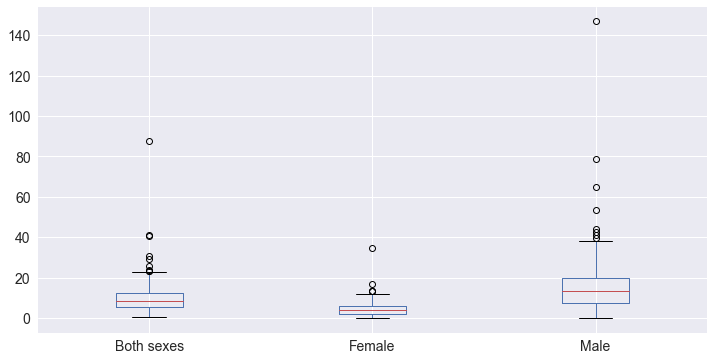

In [50]:
country_2019.boxplot()
plt.show()

In [51]:
country_2019.mean()

Sex
Both sexes    10.086885
Female         4.535519
Male          16.139344
dtype: float64

there are many data which looks exteme, not a normal data, was at outside of the boxplot at the top.

Also we observe that there is one extraordinaryly high. We can filter that country by selecting the `Both` rate larger than 80, or the `Male` rate higher than 140.

In [52]:
country_2019[country_2019['Male']>140]

Sex,Both sexes,Female,Male
Country,,,
Lesotho,87.5,34.6,146.9


We can also order the record and then check the top

In [53]:
country_2019.sort_values('Both sexes', axis=0, ascending=False, inplace=True)
country_2019.head()

Sex,Both sexes,Female,Male
Country,,,
Lesotho,87.5,34.6,146.9
Guyana,40.9,17.0,65.0
Eswatini,40.5,6.4,78.7
Kiribati,30.6,9.5,53.6
Micronesia (Federated States of),29.0,13.2,44.3


Now let's look at the pmf (histogram) and cdf (through hist cumulative).

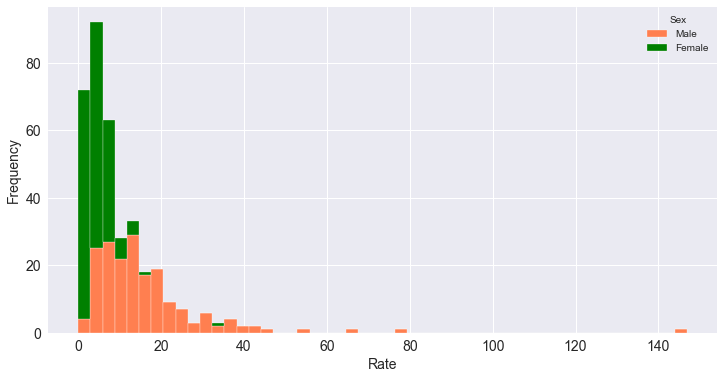

In [54]:
ax = country_2019.plot.hist(stacked=True, y=['Male', 'Female'], bins=50, color=['Coral', 'Green'], ec='white')
ax.set_xlabel('Rate')
plt.show()

the rate of male is much higher than femal.

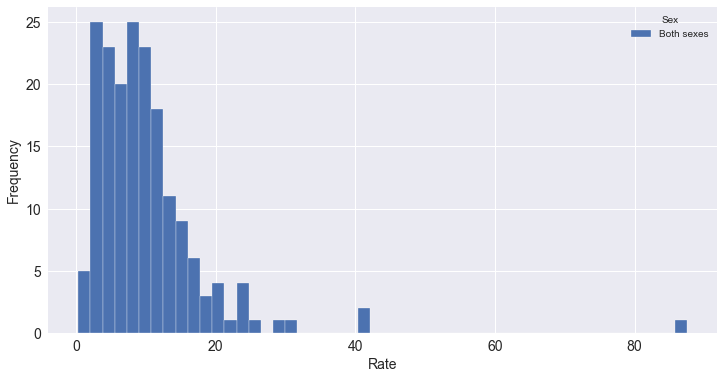

In [55]:
ax = country_2019.plot.hist(y=['Both sexes'], bins=50,ec='white')
ax.set_xlabel('Rate')
plt.show()

It shows that male is much higher in suicide rate than female.

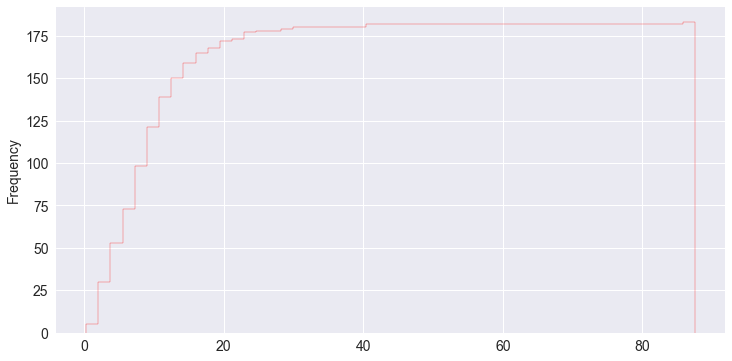

In [56]:
country_2019['Both sexes'].plot.hist(grid=True, cumulative=True, bins=50, histtype='step',ec='red')
plt.show()

It does not look like a normal distribution, because below the mean value (which is 10) is not showing any decrease trend towards left side (<10 side). 

## Probability plot

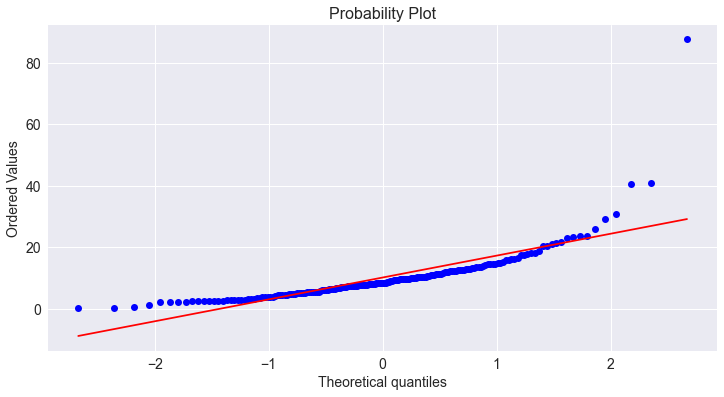

In [57]:
import scipy.stats as st

ax = st.probplot(country_2019['Both sexes'], dist='norm', plot=plt)
plt.show()

the probability plot show that normal distribution is not a good fit

((array([0.02429869, 0.04396353, 0.06010995, 0.07438456, 0.08746701,
         0.09969973, 0.1112857 , 0.1223577 , 0.13300854, 0.14330632,
         0.15330285, 0.16303872, 0.17254649, 0.18185277, 0.19097968,
         0.19994584, 0.20876716, 0.21745733, 0.22602826, 0.23449041,
         0.24285301, 0.25112429, 0.2593116 , 0.26742157, 0.27546018,
         0.2834329 , 0.29134468, 0.29920011, 0.30700337, 0.31475835,
         0.32246866, 0.33013764, 0.33776841, 0.3453639 , 0.35292686,
         0.36045986, 0.36796534, 0.37544561, 0.38290286, 0.39033916,
         0.39775649, 0.40515674, 0.41254173, 0.41991318, 0.42727276,
         0.43462207, 0.44196266, 0.44929604, 0.45662363, 0.46394686,
         0.47126708, 0.47858563, 0.48590379, 0.49322285, 0.50054402,
         0.50786854, 0.51519759, 0.52253235, 0.52987396, 0.53722357,
         0.54458231, 0.55195129, 0.5593316 , 0.56672434, 0.57413061,
         0.58155148, 0.58898803, 0.59644133, 0.60391245, 0.61140248,
         0.61891247, 0.62644352, 0

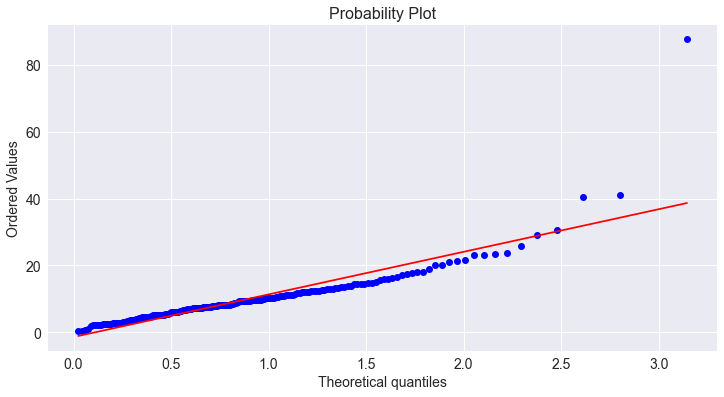

In [58]:
rvweib = st.weibull_min(c=1.5)
st.probplot(country_2019['Both sexes'], dist=rvweib, plot=plt)

Weibull distribution seems a better one comapre with the normal distribution probability plot. But at the large end still not fit well.

((array([0.01371548, 0.02718551, 0.03900246, 0.04987292, 0.06012445,
         0.06992732, 0.07938487, 0.08856597, 0.09751957, 0.10628207,
         0.11488154, 0.12334022, 0.13167614, 0.13990418, 0.14803684,
         0.15608474, 0.16405702, 0.17196164, 0.17980558, 0.18759499,
         0.1953354 , 0.20303173, 0.21068844, 0.21830959, 0.22589886,
         0.23345965, 0.24099509, 0.24850806, 0.25600125, 0.26347718,
         0.27093818, 0.27838647, 0.28582412, 0.29325311, 0.30067529,
         0.30809244, 0.31550626, 0.32291835, 0.33033029, 0.33774355,
         0.34515958, 0.35257977, 0.36000547, 0.36743798, 0.37487857,
         0.38232849, 0.38978895, 0.39726112, 0.40474617, 0.41224525,
         0.41975947, 0.42728995, 0.43483777, 0.44240401, 0.44998976,
         0.45759607, 0.46522399, 0.47287459, 0.4805489 , 0.48824798,
         0.49597287, 0.50372461, 0.51150426, 0.51931286, 0.52715148,
         0.53502116, 0.54292299, 0.55085803, 0.55882738, 0.56683212,
         0.57487337, 0.58295226, 0

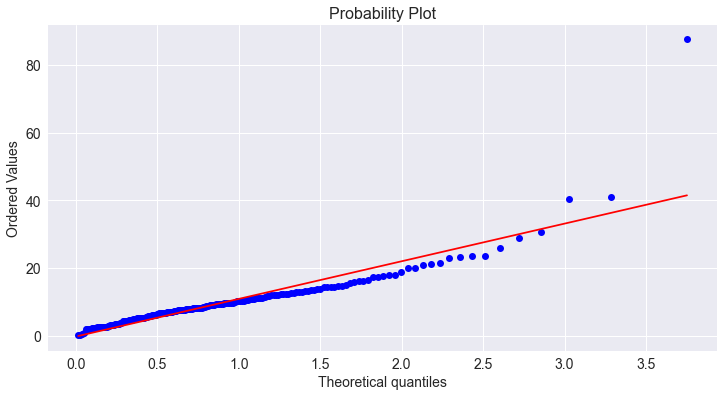

In [59]:
rvweib = st.weibull_min(c=1.3)
st.probplot(country_2019['Both sexes'], dist=rvweib, plot=plt)

## Linear Regression

In statistical modeling, regression analysis is a set of statistical processes for estimating the **relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features')**. 

Linear regression means try to find if the relation of them are linear or not. so if it is 2 variables, then should be like:  
$$ y = ax + b $$

At wikipedia website we can find a data table regarding sunshine duration of world different countyies and different cities. We can try to check the suicide rate and sunshine duration data and see if there possible any kind of correlation between them.

In [60]:
import os
sunshine_data_path = pathlib.Path(os.getcwd())/'..'/'unitA2'/'sunshine_data.html'

In [61]:
data_sunshine = pd.read_html(sunshine_data_path, index_col=[0,1])
data_sunshine

[                     Country          City    Jan    Feb    Mar    Apr    May  \
 Africa  0        Ivory Coast        Gagnoa  183.0  180.0  196.0  188.0  181.0   
         1        Ivory Coast       BouakÃ©  242.0  224.0  219.0  194.0  208.0   
         2        Ivory Coast       Abidjan  223.0  223.0  239.0  214.0  205.0   
         3        Ivory Coast      OdiennÃ©  242.0  220.2  217.3  214.7  248.8   
         4        Ivory Coast        FerkÃ©  279.0  249.0  253.0  229.0  251.0   
 ...                      ...           ...    ...    ...    ...    ...    ...   
 Oceania 11       New Zealand  Christchurch  224.4  190.5  177.4  155.6  133.3   
         12       New Zealand    Wellington  240.3  205.0  194.7  153.8  126.0   
         13       New Zealand       Dunedin  179.6  158.0  146.1  125.9  108.4   
         14  Papua New Guinea  Port Moresby  182.0  158.0  184.0  200.0  211.0   
         15   Solomon Islands       Honiara  186.0  155.4  198.4  192.0  210.8   
 
              

In [63]:
type(data_sunshine)

list

In [64]:
df_sunshine=data_sunshine[0]
df_sunshine

Country          City    Jan    Feb    Mar    Apr    May  \
Africa  0        Ivory Coast        Gagnoa  183.0  180.0  196.0  188.0  181.0   
        1        Ivory Coast       BouakÃ©  242.0  224.0  219.0  194.0  208.0   
        2        Ivory Coast       Abidjan  223.0  223.0  239.0  214.0  205.0   
        3        Ivory Coast      OdiennÃ©  242.0  220.2  217.3  214.7  248.8   
        4        Ivory Coast        FerkÃ©  279.0  249.0  253.0  229.0  251.0   
...                      ...           ...    ...    ...    ...    ...    ...   
Oceania 11       New Zealand  Christchurch  224.4  190.5  177.4  155.6  133.3   
        12       New Zealand    Wellington  240.3  205.0  194.7  153.8  126.0   
        13       New Zealand       Dunedin  179.6  158.0  146.1  125.9  108.4   
        14  Papua New Guinea  Port Moresby  182.0  158.0  184.0  200.0  211.0   
        15   Solomon Islands       Honiara  186.0  155.4  198.4  192.0  210.8   

              Jun    Jul    Aug    Sep    Oct    Nov    Dec    Year   Ref.  
Africa  0   118.0   97.0   80.0  110.0  155.0  171.0  164.0  1823.0    [2]  
        1   145.0  104.0   82.0  115.0  170.0  191.0  198.0  2092.0    [2]  
        2   128.0  137.0  125.0  139.0  215.0  224.0  224.0  2296.0    [2]  
        3   221.8  183.5  174.5  185.4  235.8  252.0  242.6  2638.6    [3]  
        4   221.0  183.0  151.0  173.0  245.0  261.0  262.0  2757.0    [2]  
...           ...    ...    ...    ...    ...    ...    ...     ...    ...  
Oceania 11  117.7  124.8  149.0  166.6  201.3  215.3  214.3  2070.2      ?  
        12  102.3  111.4  137.2  163.2  191.1  210.8  222.9  2058.7      ?  
        13   95.3  110.6  122.2  136.8  165.5  166.9  168.3  1683.7  [185]  
        14  200.0  203.0  222.0  213.0  231.0  243.0  216.0  2463.0    NaN  
        15  198.0  186.0  204.6  192.0  226.3  216.0  164.3  2330.0    NaN  

[379 rows x 16 columns]

In [65]:
df_ss_country = df_sunshine.groupby(df_sunshine['Country']).agg('mean')
df_ss_country

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
Country,,,,,,,,,,,,,
Afghanistan,177.200000,178.600000,204.500000,232.500000,310.300000,353.400000,356.800000,339.70,303.900000,282.600000,253.200000,182.400000,3175.100000
Albania,124.000000,125.000000,165.000000,191.000000,263.000000,298.000000,354.000000,327.00,264.000000,218.000000,127.000000,88.000000,2544.000000
Algeria,223.300000,220.250000,262.200000,292.500000,323.800000,312.000000,353.250000,325.35,262.500000,269.500000,225.000000,204.400000,3266.500000
Angola,219.000000,208.000000,213.000000,199.000000,233.000000,223.000000,175.000000,150.00,145.000000,164.000000,199.000000,212.000000,2341.000000
Argentina,238.250000,207.066667,185.050000,170.616667,151.466667,123.383333,138.616667,170.40,174.600000,208.566667,222.833333,229.450000,2220.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,117.800000,127.100000,164.300000,216.000000,303.800000,363.000000,384.400000,365.80,300.000000,226.300000,150.000000,105.400000,2823.900000
Venezuela,259.133333,243.900000,261.700000,224.666667,217.400000,212.333333,248.100000,248.00,245.833333,251.400000,239.000000,243.933333,2895.300000
Vietnam,178.250000,168.000000,190.500000,185.000000,203.500000,182.250000,196.250000,175.00,161.750000,158.500000,157.250000,167.000000,2123.500000


In [66]:
df_sunshine[df_sunshine['Country']=='Albania']

,,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.
Europe,0,Albania,Tirana,124.0,125.0,165.0,191.0,263.0,298.0,354.0,327.0,264.0,218.0,127.0,88.0,2544.0,NaN


In [67]:
df_ss_country.loc['Albania']

Jan      124.0
Feb      125.0
Mar      165.0
Apr      191.0
May      263.0
Jun      298.0
Jul      354.0
Aug      327.0
Sep      264.0
Oct      218.0
Nov      127.0
Dec       88.0
Year    2544.0
Name: Albania, dtype: float64

In [68]:
df_sunshine[df_sunshine['Country']=='China']

Country       City    Jan    Feb    Mar    Apr    May    Jun    Jul  \
Asia 3    China    Beijing  194.1  194.7  231.8  251.9  283.4  261.4  212.4   
     4    China  Chongqing   48.0   56.0   81.0  111.0  139.0  128.0  221.0   
     5    China     Fuzhou  101.6   79.2   89.1  111.0  114.4  141.9  225.6   
     6    China  Guangzhou  118.5   71.6   62.4   65.1  104.0  140.2  202.0   
     7    China  Hong Kong  143.0   94.2   90.8  101.7  140.4  146.1  212.0   
     8    China      Lhasa  250.9  226.7  246.1  248.9  276.6  257.3  227.4   
     9    China      Macau  127.4   79.4   71.5   85.3  136.4  155.3  223.2   
     10   China    Nanjing  124.7  120.3  144.7  169.2  194.2  162.8  196.7   
     11   China     Ningbo  123.7  108.4  121.7  142.4  156.7  147.8  243.8   
     12   China    Qingdao  186.0  180.8  220.1  222.0  244.9  219.0  182.9   
     13   China   Shanghai  114.3  119.9  128.5  148.5  169.8  130.9  190.8   
     14   China    Tianjin  170.1  170.2  202.4  223.8  249.0  226.9  206.4   
     15   China   ÃrÃ¼mqi  101.6  128.8  180.5  248.0  283.3  282.7  298.7   
     16   China      Wuhan  101.9   97.0  121.8  152.8  181.0  170.9  220.2   
     17   China     Xiamen  133.3   88.3   89.6  105.6  132.6  163.8  234.6   

           Aug    Sep    Oct    Nov    Dec    Year  Ref.  
Asia 3   220.9  232.1  222.1  185.3  180.7  2670.8     ?  
     4   222.0  123.0   63.0   47.0   54.0  1293.0     ?  
     5   199.2  153.7  144.2  120.3  126.9  1607.1     ?  
     6   173.5  170.2  181.8  172.7  166.0  1628.0     ?  
     7   188.9  172.3  193.9  180.1  172.2  1835.6  [75]  
     8   219.6  229.0  281.7  267.4  258.6  2990.2  [76]  
     9   195.4  176.5  192.3  172.2  159.1  1773.9  [77]  
     10  201.6  164.0  164.2  147.4  137.1  1926.9  [77]  
     11  238.0  171.5  166.5  143.4  146.1  1910.0     ?  
     12  223.2  219.0  220.1  189.0  182.9  2489.9     ?  
     13  185.7  167.5  161.4  131.1  127.4  1775.8     ?  
     14  204.4  205.3  196.1  163.0  157.6  2375.2     ?  
     15  301.0  262.6  224.4  127.4   84.3  2523.3  [78]  
     16  226.4  175.8  151.9  139.3  126.5  1775.8     ?  
     17  211.6  178.9  188.4  163.0  163.5  1853.2     ?

In [69]:
df_ss_country.loc['China']

Jan      135.940000
Feb      121.033333
Mar      138.800000
Apr      159.146667
May      187.046667
Jun      182.333333
Jul      219.846667
Aug      214.093333
Sep      186.760000
Oct      183.466667
Nov      156.573333
Dec      149.526667
Year    2028.580000
Name: China, dtype: float64

In [70]:
df_new = pd.merge(country_2019, df_ss_country, left_index=True, right_index=True, how='outer')
df_new

,Both sexes,Female,Male,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
Country,,,,,,,,,,,,,,,,
Afghanistan,6.0,5.7,6.2,177.200000,178.600000,204.500000,232.5,310.300000,353.40,356.80,339.70,303.90,282.600000,253.20,182.40,3175.100000
Albania,3.7,2.2,5.3,124.000000,125.000000,165.000000,191.0,263.000000,298.00,354.00,327.00,264.00,218.000000,127.00,88.00,2544.000000
Algeria,2.6,1.9,3.3,223.300000,220.250000,262.200000,292.5,323.800000,312.00,353.25,325.35,262.50,269.500000,225.00,204.40,3266.500000
Angola,12.6,4.7,21.7,219.000000,208.000000,213.000000,199.0,233.000000,223.00,175.00,150.00,145.00,164.000000,199.00,212.00,2341.000000
Antigua and Barbuda,0.3,0.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,7.2,4.2,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vietnam,NaN,NaN,NaN,178.250000,168.000000,190.500000,185.0,203.500000,182.25,196.25,175.00,161.75,158.500000,157.25,167.00,2123.500000
Yemen,7.1,5.3,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df_new.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Vietnam', 'Yemen',
       'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=204)

We can find that for come countries, the two table are using different names, for example 'Venezuela' and 'Venezuela (Bolivarian Republic of)', also 'Viet Nam' and 'Vietnam'. Because we can not find a standard country code which is common to both table, this becomes the diffuculties we have to check.

In [72]:
df_new.to_csv('check country name.csv')

In [73]:
country_name_map  = {'Iran (Islamic Republic of)': 'Iran',
                     'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
                     'United States of America':'United States',
                     'Venezuela (Bolivarian Republic of)': 'Venezuela',
                     'Viet Nam': 'Vietnam'}
country_2019['New country'] = country_2019.index.to_series().replace(country_name_map)

In [74]:
country_2019.set_index('New country', drop=True, inplace=True)
country_2019

Sex,Both sexes,Female,Male
New country,,,
Lesotho,87.5,34.6,146.9
Guyana,40.9,17.0,65.0
Eswatini,40.5,6.4,78.7
Kiribati,30.6,9.5,53.6
Micronesia (Federated States of),29.0,13.2,44.3
...,...,...,...
Jordan,2.0,0.9,3.0
Saint Vincent and the Grenadines,1.0,0.7,1.3
Grenada,0.6,0.7,0.5


In [75]:
df_new = pd.merge(country_2019, df_ss_country, left_index=True, right_index=True, how='outer')
df_new

,Both sexes,Female,Male,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
Afghanistan,6.0,5.7,6.2,177.200000,178.600000,204.500000,232.500000,310.300000,353.400000,356.80,339.70,303.900000,282.600000,253.20,182.400000,3175.100000
Albania,3.7,2.2,5.3,124.000000,125.000000,165.000000,191.000000,263.000000,298.000000,354.00,327.00,264.000000,218.000000,127.00,88.000000,2544.000000
Algeria,2.6,1.9,3.3,223.300000,220.250000,262.200000,292.500000,323.800000,312.000000,353.25,325.35,262.500000,269.500000,225.00,204.400000,3266.500000
Angola,12.6,4.7,21.7,219.000000,208.000000,213.000000,199.000000,233.000000,223.000000,175.00,150.00,145.000000,164.000000,199.00,212.000000,2341.000000
Antigua and Barbuda,0.3,0.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,2.1,0.7,3.7,259.133333,243.900000,261.700000,224.666667,217.400000,212.333333,248.10,248.00,245.833333,251.400000,239.00,243.933333,2895.300000
Vietnam,7.2,4.2,10.6,178.250000,168.000000,190.500000,185.000000,203.500000,182.250000,196.25,175.00,161.750000,158.500000,157.25,167.000000,2123.500000
Yemen,7.1,5.3,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,14.4,5.3,25.7,180.833333,168.933333,221.133333,254.000000,286.233333,278.000000,300.70,306.90,289.000000,273.833333,223.00,182.900000,2965.466667


Now the new dataframe country name issue resolved.

In [76]:
df_new.dropna(inplace=True)
df_new

,Both sexes,Female,Male,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
Afghanistan,6.0,5.7,6.2,177.200000,178.600000,204.500000,232.500000,310.300000,353.400000,356.800000,339.70,303.900000,282.600000,253.200000,182.400000,3175.100000
Albania,3.7,2.2,5.3,124.000000,125.000000,165.000000,191.000000,263.000000,298.000000,354.000000,327.00,264.000000,218.000000,127.000000,88.000000,2544.000000
Algeria,2.6,1.9,3.3,223.300000,220.250000,262.200000,292.500000,323.800000,312.000000,353.250000,325.35,262.500000,269.500000,225.000000,204.400000,3266.500000
Angola,12.6,4.7,21.7,219.000000,208.000000,213.000000,199.000000,233.000000,223.000000,175.000000,150.00,145.000000,164.000000,199.000000,212.000000,2341.000000
Argentina,8.1,3.3,13.5,238.250000,207.066667,185.050000,170.616667,151.466667,123.383333,138.616667,170.40,174.600000,208.566667,222.833333,229.450000,2220.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,8.3,4.9,11.8,117.800000,127.100000,164.300000,216.000000,303.800000,363.000000,384.400000,365.80,300.000000,226.300000,150.000000,105.400000,2823.900000
Venezuela,2.1,0.7,3.7,259.133333,243.900000,261.700000,224.666667,217.400000,212.333333,248.100000,248.00,245.833333,251.400000,239.000000,243.933333,2895.300000
Vietnam,7.2,4.2,10.6,178.250000,168.000000,190.500000,185.000000,203.500000,182.250000,196.250000,175.00,161.750000,158.500000,157.250000,167.000000,2123.500000
Zambia,14.4,5.3,25.7,180.833333,168.933333,221.133333,254.000000,286.233333,278.000000,300.700000,306.90,289.000000,273.833333,223.000000,182.900000,2965.466667


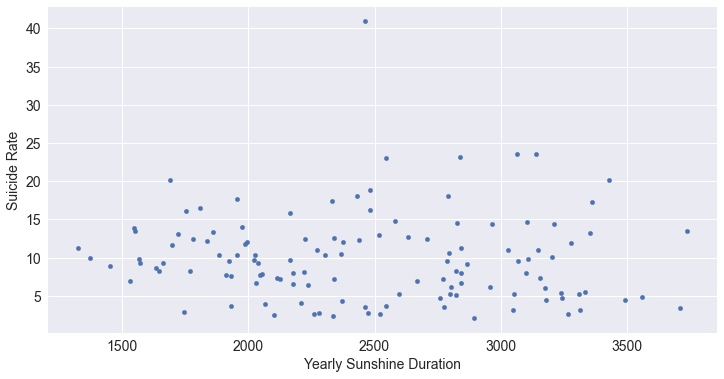

In [77]:
ax = df_new.plot(kind='scatter', x='Year', y='Both sexes')
ax.set_xlabel('Yearly Sunshine Duration')
ax.set_ylabel('Suicide Rate')
plt.show()

### using SciPy for linear regression

Linear regression, is basically for a set of data $(x_i, y_i)$, find a line which best fit all those data: $$y = ax+b$$

In [78]:
rv = df_new[['Year', 'Both sexes']].to_numpy()
rv

array([[3.17510000e+03, 6.00000000e+00],
       [2.54400000e+03, 3.70000000e+00],
       [3.26650000e+03, 2.60000000e+00],
       [2.34100000e+03, 1.26000000e+01],
       [2.22030000e+03, 8.10000000e+00],
       [2.47400000e+03, 2.70000000e+00],
       [2.84356667e+03, 1.13000000e+01],
       [1.88400000e+03, 1.04000000e+01],
       [2.20740000e+03, 4.00000000e+00],
       [2.06600000e+03, 3.90000000e+00],
       [1.80700000e+03, 1.65000000e+01],
       [1.54600000e+03, 1.39000000e+01],
       [2.63046667e+03, 1.27000000e+01],
       [1.76900000e+03, 8.30000000e+00],
       [3.42666667e+03, 2.02000000e+01],
       [2.23758182e+03, 6.40000000e+00],
       [2.17700000e+03, 6.50000000e+00],
       [3.20900000e+03, 1.44000000e+01],
       [2.37340000e+03, 1.21000000e+01],
       [2.16512500e+03, 1.59000000e+01],
       [2.02804444e+03, 1.03000000e+01],
       [2.54650000e+03, 2.30000000e+01],
       [3.35320000e+03, 1.32000000e+01],
       [2.84178000e+03, 8.00000000e+00],
       [2.028580

In [79]:
result = st.linregress(rv.T)
print(result)

LinregressResult(slope=-0.0005738120093998853, intercept=11.38520524736704, rvalue=-0.05806254629691001, pvalue=0.5218152700333842, stderr=0.0008932239186459852, intercept_stderr=2.2676366374965635)


We check the slope result value, and also check the pvalue, the result tells that quite sure the slope should be 0. which means there is **no reslation** between sunshine time and suicide rate.

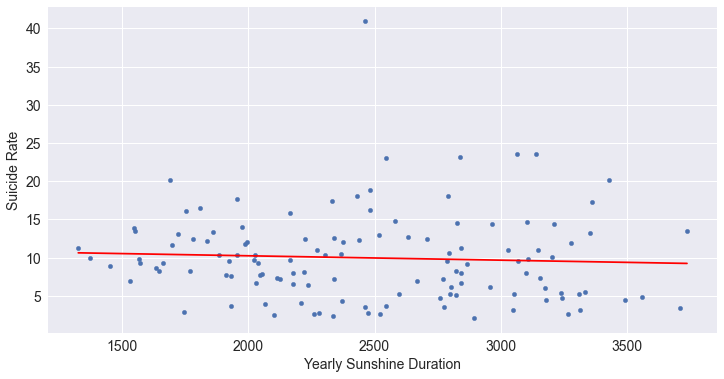

In [80]:
a, b = result.slope, result.intercept
x = np.linspace(df_new['Year'].min(), df_new['Year'].max(), endpoint=True)
y = a*x+b
ax = df_new.plot(kind='scatter', x='Year', y='Both sexes')
ax.set_xlabel('Yearly Sunshine Duration')
ax.set_ylabel('Suicide Rate')
ax.plot(x,y,color='red')
plt.show()

Simulation shows a decline trend, when sunshine duration increase, the suicide rate tends to decrease. The correlation is not strong.

## Multivariate linear regression

When has multiple random variables, the linear formula becomes:
$$ y = k_2 x_2 + k_1 x_1 + k_0 $$  
Here has 2 independant random variables $x_2$ and $x_1$, the dependant random variable is $y$.

Pandas has a data webservice, which gives DataFrame interface for many famous data source, for example world bank. to use those data just need import the package, find the indicators, and create the dataframe object and download the data needed.  
Use `pip install pandas_datareader` to install the package. (If has Anaconda, use `conda install pandas-datareader`)

In [101]:
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const')
matches

,id,name,unit,source,sourceNote,sourceOrganization,topics
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
9296,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9298,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9300,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
9301,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [82]:
dat = wb.download(indicator='NY.GDP.PCAP.PP.KD', country='all', start=2000, end=2020)
dat

NY.GDP.PCAP.PP.KD
country                     year                   
Africa Eastern and Southern 2020        3387.594670
                            2019        3568.597017
                            2018        3579.271917
                            2017        3569.667028
                            2016        3546.711250
...                                             ...
Zimbabwe                    2004        2682.783000
                            2003        2857.152336
                            2002        3450.189031
                            2001        3796.657107
                            2000        3756.139483

[5586 rows x 1 columns]

In [83]:
dat.index

MultiIndex([('Africa Eastern and Southern', '2020'),
            ('Africa Eastern and Southern', '2019'),
            ('Africa Eastern and Southern', '2018'),
            ('Africa Eastern and Southern', '2017'),
            ('Africa Eastern and Southern', '2016'),
            ('Africa Eastern and Southern', '2015'),
            ('Africa Eastern and Southern', '2014'),
            ('Africa Eastern and Southern', '2013'),
            ('Africa Eastern and Southern', '2012'),
            ('Africa Eastern and Southern', '2011'),
            ...
            (                   'Zimbabwe', '2009'),
            (                   'Zimbabwe', '2008'),
            (                   'Zimbabwe', '2007'),
            (                   'Zimbabwe', '2006'),
            (                   'Zimbabwe', '2005'),
            (                   'Zimbabwe', '2004'),
            (                   'Zimbabwe', '2003'),
            (                   'Zimbabwe', '2002'),
            (                 

In [84]:
gdp_latest = dat.xs('2019', level=1, axis=0)
gdp_latest = gdp_latest.dropna()
gdp_latest

,NY.GDP.PCAP.PP.KD
country,
Africa Eastern and Southern,3568.597017
Africa Western and Central,4142.398382
Arab World,14599.707893
Caribbean small states,15994.260460
Central Europe and the Baltics,32553.732435
...,...
Vanuatu,3117.678832
Vietnam,8041.178384
West Bank and Gaza,6245.448697


In [85]:
df_3_rv = pd.merge(df_new, gdp_latest, left_index=True, right_index=True, how='outer')
df_3_rv

,Both sexes,Female,Male,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,NY.GDP.PCAP.PP.KD
Afghanistan,6.0,5.7,6.2,177.200000,178.600000,204.500000,232.5,310.300000,353.40,356.80,339.70,303.90,282.600000,253.20,182.40,3175.100000,2065.036235
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3568.597017
Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4142.398382
Albania,3.7,2.2,5.3,124.000000,125.000000,165.000000,191.0,263.000000,298.00,354.00,327.00,264.00,218.000000,127.00,88.00,2544.000000,13671.488422
Algeria,2.6,1.9,3.3,223.300000,220.250000,262.200000,292.5,323.800000,312.00,353.25,325.35,262.50,269.500000,225.00,204.40,3266.500000,11510.557088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,7.2,4.2,10.6,178.250000,168.000000,190.500000,185.0,203.500000,182.25,196.25,175.00,161.75,158.500000,157.25,167.00,2123.500000,8041.178384
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6245.448697
World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16915.287846
Zambia,14.4,5.3,25.7,180.833333,168.933333,221.133333,254.0,286.233333,278.00,300.70,306.90,289.00,273.833333,223.00,182.90,2965.466667,3470.448024


In [86]:
df_3_rv.to_csv('check_3_rv.csv')

Again we found few country name issue, need map the names.

In [87]:
country_name_map2  = {'Congo, Rep.': 'Congo',
                      'Egypt, Arab Rep.': 'Egypt',
                      'Gambia, The': 'Gambia',
                      'Iran, Islamic Rep.': 'Iran'}
gdp_latest['new country'] = gdp_latest.index.to_series().replace(country_name_map2)
gdp_latest

,NY.GDP.PCAP.PP.KD,new country
country,,
Africa Eastern and Southern,3568.597017,Africa Eastern and Southern
Africa Western and Central,4142.398382,Africa Western and Central
Arab World,14599.707893,Arab World
Caribbean small states,15994.260460,Caribbean small states
Central Europe and the Baltics,32553.732435,Central Europe and the Baltics
...,...,...
Vanuatu,3117.678832,Vanuatu
Vietnam,8041.178384,Vietnam
West Bank and Gaza,6245.448697,West Bank and Gaza


In [88]:
gdp_latest.set_index('new country', drop=True, inplace=True)
gdp_latest

,NY.GDP.PCAP.PP.KD
new country,
Africa Eastern and Southern,3568.597017
Africa Western and Central,4142.398382
Arab World,14599.707893
Caribbean small states,15994.260460
Central Europe and the Baltics,32553.732435
...,...
Vanuatu,3117.678832
Vietnam,8041.178384
West Bank and Gaza,6245.448697


In [89]:
df_3_rv = pd.merge(df_new, gdp_latest, left_index=True, right_index=True, how='outer')
df_3_rv

,Both sexes,Female,Male,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,NY.GDP.PCAP.PP.KD
Afghanistan,6.0,5.7,6.2,177.200000,178.600000,204.500000,232.5,310.300000,353.40,356.80,339.70,303.90,282.600000,253.20,182.40,3175.100000,2065.036235
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3568.597017
Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4142.398382
Albania,3.7,2.2,5.3,124.000000,125.000000,165.000000,191.0,263.000000,298.00,354.00,327.00,264.00,218.000000,127.00,88.00,2544.000000,13671.488422
Algeria,2.6,1.9,3.3,223.300000,220.250000,262.200000,292.5,323.800000,312.00,353.25,325.35,262.50,269.500000,225.00,204.40,3266.500000,11510.557088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,7.2,4.2,10.6,178.250000,168.000000,190.500000,185.0,203.500000,182.25,196.25,175.00,161.75,158.500000,157.25,167.00,2123.500000,8041.178384
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6245.448697
World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16915.287846
Zambia,14.4,5.3,25.7,180.833333,168.933333,221.133333,254.0,286.233333,278.00,300.70,306.90,289.00,273.833333,223.00,182.90,2965.466667,3470.448024


In [90]:
df_3_rv.dropna(inplace=True)
df_3_rv

,Both sexes,Female,Male,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,NY.GDP.PCAP.PP.KD
Afghanistan,6.0,5.7,6.2,177.200000,178.600000,204.500000,232.500000,310.300000,353.400000,356.800000,339.70,303.90,282.600000,253.200000,182.40,3175.100000,2065.036235
Albania,3.7,2.2,5.3,124.000000,125.000000,165.000000,191.000000,263.000000,298.000000,354.000000,327.00,264.00,218.000000,127.000000,88.00,2544.000000,13671.488422
Algeria,2.6,1.9,3.3,223.300000,220.250000,262.200000,292.500000,323.800000,312.000000,353.250000,325.35,262.50,269.500000,225.000000,204.40,3266.500000,11510.557088
Angola,12.6,4.7,21.7,219.000000,208.000000,213.000000,199.000000,233.000000,223.000000,175.000000,150.00,145.00,164.000000,199.000000,212.00,2341.000000,6670.331458
Argentina,8.1,3.3,13.5,238.250000,207.066667,185.050000,170.616667,151.466667,123.383333,138.616667,170.40,174.60,208.566667,222.833333,229.45,2220.300000,22063.904372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,18.8,7.7,31.1,294.900000,230.600000,222.800000,179.600000,164.200000,129.700000,139.700000,164.40,182.30,239.000000,248.900000,285.30,2481.400000,23032.734044
Uzbekistan,8.3,4.9,11.8,117.800000,127.100000,164.300000,216.000000,303.800000,363.000000,384.400000,365.80,300.00,226.300000,150.000000,105.40,2823.900000,7014.324699
Vietnam,7.2,4.2,10.6,178.250000,168.000000,190.500000,185.000000,203.500000,182.250000,196.250000,175.00,161.75,158.500000,157.250000,167.00,2123.500000,8041.178384
Zambia,14.4,5.3,25.7,180.833333,168.933333,221.133333,254.000000,286.233333,278.000000,300.700000,306.90,289.00,273.833333,223.000000,182.90,2965.466667,3470.448024


We first check the suicide rate and GDP these 2 variates.

In [91]:
rv = df_3_rv[['NY.GDP.PCAP.PP.KD', 'Both sexes']].to_numpy()
rv

array([[2.06503624e+03, 6.00000000e+00],
       [1.36714884e+04, 3.70000000e+00],
       [1.15105571e+04, 2.60000000e+00],
       [6.67033146e+03, 1.26000000e+01],
       [2.20639044e+04, 8.10000000e+00],
       [1.36537634e+04, 2.70000000e+00],
       [4.94555385e+04, 1.13000000e+01],
       [5.58333157e+04, 1.04000000e+01],
       [1.44393014e+04, 4.00000000e+00],
       [4.75372660e+03, 3.90000000e+00],
       [1.92831171e+04, 1.65000000e+01],
       [5.17427264e+04, 1.39000000e+01],
       [3.28730954e+03, 1.27000000e+01],
       [1.48967900e+04, 8.30000000e+00],
       [1.77768083e+04, 2.02000000e+01],
       [1.47638717e+04, 6.40000000e+00],
       [2.31915746e+04, 6.50000000e+00],
       [2.17832288e+03, 1.44000000e+01],
       [7.51664153e+02, 1.21000000e+01],
       [3.64227627e+03, 1.59000000e+01],
       [4.90067431e+04, 1.03000000e+01],
       [9.45142043e+02, 2.30000000e+01],
       [1.57962610e+03, 1.32000000e+01],
       [2.49675802e+04, 8.00000000e+00],
       [1.609230

In [92]:
result = st.linregress(rv.T)
print(result)

LinregressResult(slope=-1.817417434285351e-05, intercept=10.387075476344924, rvalue=-0.0689218226362609, pvalue=0.4563934745927297, stderr=2.4320418886822514e-05, intercept_stderr=0.7564535046242353)


again, the slope value, also the pvalue, tells that GDP has **no relation** with suicide rate.

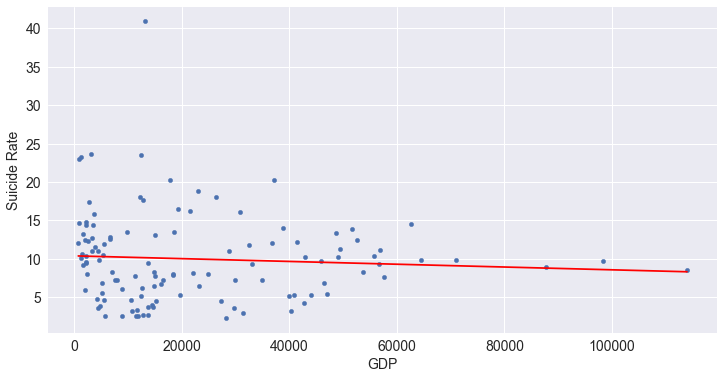

In [93]:
a, b = result.slope, result.intercept
x = np.linspace(df_3_rv['NY.GDP.PCAP.PP.KD'].min(), df_3_rv['NY.GDP.PCAP.PP.KD'].max(), endpoint=True)
y = a*x+b
ax = df_3_rv.plot.scatter(x='NY.GDP.PCAP.PP.KD', y='Both sexes')
ax.set_xlabel('GDP')
ax.set_ylabel('Suicide Rate')
ax.plot(x,y,color='red')
plt.show()

So we can see that maybe with the increase of GDP, it is showing a trend of decrease in suicide rate. The correlation is not strong.  
Maybe a more noticable observation is with the GDP increase, the variation of different country tends to become narrower.  
The linregress() function from scipy.stats, only can do one random variable and one dependant variable. It we want work on multi variates regress then need to use other packages.

### Using scikit learn, and statsmodels (supports multi-variables linear regression)

In [94]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = df_3_rv[['Year', 'NY.GDP.PCAP.PP.KD']]
y = df_3_rv['Both sexes']
regr.fit(x,y)
print(regr.coef_)
print(regr.intercept_)

[-1.26912103e-03 -3.47018295e-05]
13.879752998804774


The coefficient for both features are very small. which gives suggestion that the feature and the result (suicide rate) has no relation.

In [95]:
from sklearn.metrics import mean_squared_error
y_predict = regr.predict(x.to_numpy())
stderr = np.sqrt(mean_squared_error(y_predict, y.to_numpy()))
stderr

5.700884352804593

The error is so big, so the linear model is not a good model for those variates we studied.

The above we using scikit learn package. We can also use other regression package like statsmodels.

In [96]:
import statsmodels.api as sm
x = x.to_numpy()
sm_x = sm.add_constant(x)
est = sm.OLS(y.to_numpy(), sm_x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.022
Date:                Mon, 20 Sep 2021   Prob (F-statistic):              0.363
Time:                        17:42:13   Log-Likelihood:                -375.99
No. Observations:                 119   AIC:                             758.0
Df Residuals:                     116   BIC:                             766.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8798      2.966      4.680      0.000       8.005      19.754
x1            -0.0013      0.001     -1.218      0.226      -0.003       0.001
x2          -3.47e-05   2.78e-05     -1.248      0.215   -8.98e-05    2.04e-05
==============================================================================
Omnibus:                       56.990   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.544
Skew:                           1.666   Prob(JB):                     4.73e-49
Kurtosis:                       8.813   Cond. No.                     1.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Two package are giving the same result. Here also we can see the pvalues, which same gives suggestion that the coefficients are 0, thus feature does not show relation with the result.

In [97]:
df_last = df_3_rv[['Both sexes', 'Year', 'NY.GDP.PCAP.PP.KD']]

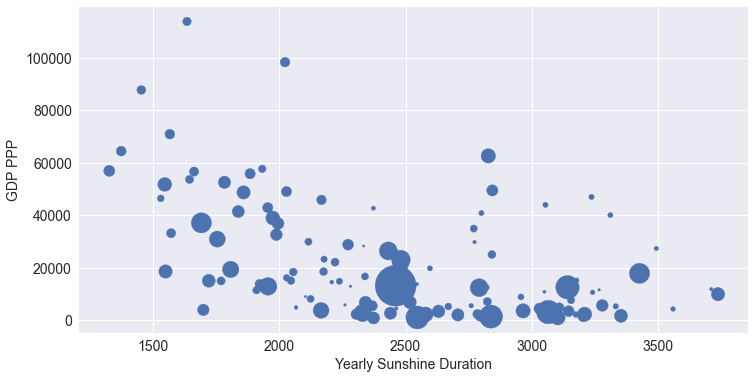

In [98]:
ax = df_last.plot(kind='scatter', x='Year', y='NY.GDP.PCAP.PP.KD', s=df_last['Both sexes']**2)
ax.set_xlabel('Yearly Sunshine Duration')
ax.set_ylabel('GDP PPP')
plt.show()

In [99]:
df_last.to_csv('final_data.csv')